## Linear Regression 

[[8.313e+01       nan 6.930e+00 ... 2.000e-02 0.000e+00 3.140e+00]
 [7.984e+01       nan 1.385e+01 ... 4.000e-02 0.000e+00 4.810e+00]
 [9.452e+01       nan 2.439e+01 ... 2.400e-01 1.000e-02 7.670e+00]
 ...
 [2.291e+01 6.573e+01 3.450e+00 ... 1.000e-02 1.000e-02 0.000e+00]
 [1.664e+01 4.997e+01 4.050e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.500e+01 6.600e+01 4.000e-01 ...       nan       nan       nan]]
[209. 328. 514. ...  68.  54.  50.]
(12,) (12,)


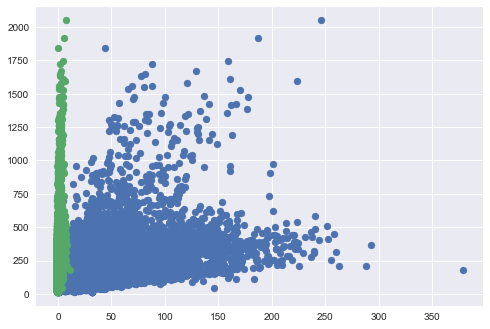

In [9]:
import numpy as np
import pandas as pd
%run ./preprocessing.ipynb


In [10]:
ones=np.ones((x_train.shape[0],1))
x_train_lr = np.hstack((ones, x_train)) #updation of older matrix by stacking in  a horizontal fashion
print(x_train_lr.shape)

(19880, 13)


In [11]:
x_train_lr[:4,:4]

array([[ 1.        , -0.68426604, -0.94456167, -0.48650126],
       [ 1.        , -0.65340169, -0.83869168, -0.37097182],
       [ 1.        , -0.58685044, -0.74141289, -0.34804575],
       [ 1.        , -0.77959186, -1.06536713, -0.48110689]])

In [12]:
def hypothesis(x,theta):
    y_=0.0 #(y hat)
    n=x.shape[0]
    for i in range(n):
        y_+=(theta[i]*x[i])
    return y_

def error(X,y,theta):
    e=0.0
    m=X.shape[0]
    
    for i in range(m):
        y_=hypothesis(X[i],theta)
        e+=(y[i]-y_)**2
        
    return e/m
    

def gradient(X,y,theta):
    m,n=X.shape
    
    grad= np.zeros((n,)) #no of features
    
    #for all values of j
    for j in range(n):
        #sum over all examples
        for i in range(m):
            y_=hypothesis(X[i],theta)
            grad[j]+=(y_-y[i])*X[i][j]
            
    #Out of loops
    return grad/m
        
    

def gradient_descent(X,y,learning_rate=0.1,max_epochs=300): #epochs number of iterations
    m,n= X.shape
    theta=np.zeros((n,))
    error_list=[]
    
    for i in range(max_epochs):
        e=error(X,y,theta)
        error_list.append(e)
        
        grad=gradient(X,y,theta)
        for j in range(n):
            theta[j]=theta[j]-learning_rate*grad[j]
            
            
    return theta,error_list

In [13]:
import pickle
with open('model_lr','rb') as f:
    linearreg_model=pickle.load(f)

In [14]:
theta, error_list=linearreg_model

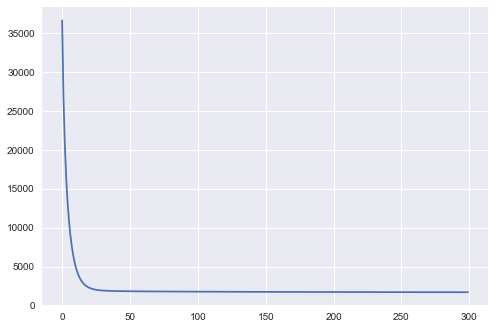

In [15]:
plt.plot(error_list)
plt.show()